# ChatGPT and Human Responses on Renewable Energy
This repository contains a collection of ChatGPT-generated responses and analyses on topics related to renewable energy. The focus is on exploring various questions on renewable energy sources, technologies, policies, and innovations that have been anwered by huamn expert and compare such responses with those provided by Chatgpt. The dataset used in this research is colloected from differnt renewable energy sources on the internet. 

# Key Areas Covered:
- Solar Energy: Photovoltaic systems, advancements in solar technology, and its global impact.
- Wind Energy: Wind turbines, offshore wind farms, and their role in energy grids.
- Hydropower: Applications, environmental impacts, and innovations in water-driven energy.
- Bioenergy: Biomass, biofuels, and the integration of bioenergy into circular economies.
- Energy Storage: Technologies such as batteries and energy storage systems that enable renewable integration.
- Sustainability: The intersection of renewable energy with sustainability practices, carbon reduction, and global policies.
- The repository aims to offer insightful data, research-based conclusions, and response common questions regarding the shift toward greener energy solutions using the power of AI.

# Lexical Text Similarity Analysis

In this notebook, we analyze the text similarity between human expert input and ChatGPT responses using various similarity metrics.

## Similarity Metrics
We use the following similarity measures:
- Jaccard
- Sørensen-Dice
- Levenshtein
- Cosine
Both raw and preprocessed text are compared using these metrics.

1. Imports and Initialization
This block imports the necessary libraries and sets up initial variables.

In [1]:
!pip install textdistance
import string  # For handling punctuation and digits
from nltk.corpus import stopwords  # For removing common stopwords
from nltk.stem.snowball import SnowballStemmer  # For stemming words
import textdistance  # For calculating text similarity

# Initialize stemmer, stopwords, and punctuations
stemmer = SnowballStemmer("english")  # Initialize English stemmer
stop_words = set(stopwords.words('english'))  # Get English stopwords
punctuations = set(string.punctuation)  # Set of punctuation characters

# Now, we initialize Data Structures. Then run pre- and post processing measurements:
We create dictionaries for storing data, though they are not used in this snippet. Then, we Open the CSV files for reading the input and writing the output. The input file contains questionid, questions, human expert responses, and chatgpt responses. The output file will contain similarity statistics.
## Preprocessing
We remove punctuations, digits, and stopwords, and apply stemming to both the input text and the response.

In [2]:
import string
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
import textdistance

# Initialize stemmer, stopwords, and punctuations
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

# Initialize dictionaries
dic1 = {}
dic2 = {}

# Open input and output files
with open("/kaggle/input/renewableenergyquestionschatgpt/RenewableEnenrgyQuestionswithoutsource.csv", "r",encoding="ISO-8859-1") as input, open("/kaggle/working/basicstatistics.csv", "w") as output:
    questionindex = 0

    # Loop through each line in the input file
    for line in input:
        data = line.split(",\"")

        # Process the first sentence
        t = ''
        text1 = ""
        text2 = ""
        lowerline = data[1].lower()
        for c in lowerline:
            if c not in punctuations and c not in string.digits:
                t += c
            else:
                t += ' '

        tokens = t.split()
        filtered_line = [w for w in tokens if not w in stop_words and len(w) > 1]
        
        for word in filtered_line:
            token = stemmer.stem(word)
            text1 += " " + token

        # Process the ChatGPT response
        t = ''
        lowerline = data[2].lower()
        for c in lowerline:
            if c not in punctuations and c not in string.digits:
                t += c
            else:
                t += ' '

        tokens = t.split()
        filtered_line = [w for w in tokens if not w in stop_words and len(w) > 1]

        for word in filtered_line:
            token = stemmer.stem(word)
            text2 += " " + token

        # Calculate similarity metrics before preprocessing and stemming
        jaccard_similarity = textdistance.jaccard(data[1], data[2])
        sorensen_similarity = textdistance.sorensen(data[1], data[2])
        levenshtein_similarity = textdistance.levenshtein.normalized_similarity(data[1], data[2])
        cosine_similarity = textdistance.cosine.normalized_similarity(data[1], data[2])

        # Calculate similarity metrics after preprocessing and stemming
        jaccard_similarity1 = textdistance.jaccard(text1, text2)
        sorensen_similarity1 = textdistance.sorensen(text1, text2)
        levenshtein_similarity1 = textdistance.levenshtein.normalized_similarity(text1, text2)
        cosine_similarity1 = textdistance.cosine.normalized_similarity(text1, text2)

        # Write results to output file
        output.write(
            f"question: {questionindex},{jaccard_similarity},{sorensen_similarity},"
            f"{levenshtein_similarity},{cosine_similarity},"
            f"{jaccard_similarity1},{sorensen_similarity1},{levenshtein_similarity1},"
            f"{cosine_similarity1}\n"
        )

        questionindex += 1


# Now, we can see the degree of similarity using these basic similarity methods:
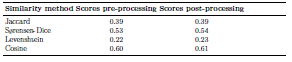

# The basic method did not show a high similarity between ChatGPT and human responses
The highest score was reported by cosine similarity with a score of 60% similarity. This is possible because these measurements depend on the degree of direct match between two responses. To measure the real similarity between the two responses, we decided to go with semantic similarity approach using word embeddings (google vector) that were built using the Word2Vec algorithm.

# Now loading google embeddings:

In [3]:
#now we lood google news vectors
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
import gensim

# Path to the GoogleNews word vectors file
path_to_bin = '/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin'

# Load pre-trained word embeddings (Word2Vec) from the local file
word_embeddings = gensim.models.KeyedVectors.load_word2vec_format(path_to_bin, binary=True)
#now we load questions dataset and output semantic measure output to semanticstatistics file

# Loading human responses and chatgpt response to measure semantic similarity:

In [4]:
with open("/kaggle/input/renewableenergyquestionschatgpt/RenewableEnenrgyQuestionswithoutsource.csv", "r",encoding="ISO-8859-1") as input,open("semanticstatistics.csv","w") as output:
    sum=0
    questionindex=1
    for line in input:
        data=line.split(",\"")
        # pick the human response and the chatgpt response
        text1 = data[1]
        text2 = data[2]
        # Tokenize the texts into individual words
        tokens1 = text1.lower().split()
        tokens2 = text2.lower().split()
        # Calculate the average word embeddings for each text
        embeddings1 = np.mean([word_embeddings[token] for token in tokens1 if token in word_embeddings], axis=0)
        embeddings2 = np.mean([word_embeddings[token] for token in tokens2 if token in word_embeddings], axis=0)

        # Reshape the embeddings for cosine distance calculation
        embeddings1 = embeddings1.reshape(1, -1)
        embeddings2 = embeddings2.reshape(1, -1)

        # Calculate the cosine distance between the embeddings
        cosine_distance = cosine_distances(embeddings1, embeddings2)

        # Calculate the cosine similarity
        cosine_similarity = 1 - cosine_distance

        print("Cosine Similarity:", cosine_similarity[0][0])
        output.write("question: "+str(questionindex)+ data[0]+"_\""+str(cosine_similarity[0][0])+"\n")
        questionindex+=1
        sum=sum+cosine_similarity[0][0]
average=sum/questionindex
print(questionindex)
print(average)

Cosine Similarity: 0.88867086
Cosine Similarity: 0.8386561
Cosine Similarity: 0.8898417
Cosine Similarity: 0.8949655
Cosine Similarity: 0.84353626
Cosine Similarity: 0.8940979
Cosine Similarity: 0.9244718
Cosine Similarity: 0.90592664
Cosine Similarity: 0.90641403
Cosine Similarity: 0.9270445
Cosine Similarity: 0.9230847
Cosine Similarity: 0.91353595
Cosine Similarity: 0.91961753
Cosine Similarity: 0.9329797
Cosine Similarity: 0.93013483
Cosine Similarity: 0.9424323
Cosine Similarity: 0.9460593
Cosine Similarity: 0.8872843
Cosine Similarity: 0.8672514
Cosine Similarity: 0.82132465
Cosine Similarity: 0.9242315
Cosine Similarity: 0.91806674
Cosine Similarity: 0.945015
Cosine Similarity: 0.91421515
Cosine Similarity: 0.91718084
Cosine Similarity: 0.92293185
Cosine Similarity: 0.9184337
Cosine Similarity: 0.9323615
Cosine Similarity: 0.8903931
Cosine Similarity: 0.91870415
Cosine Similarity: 0.8412318
Cosine Similarity: 0.7916291
Cosine Similarity: 0.8860192
Cosine Similarity: 0.89084095
C

# Here are some Figures to show the distribution of semantic semilarity scores clearly:

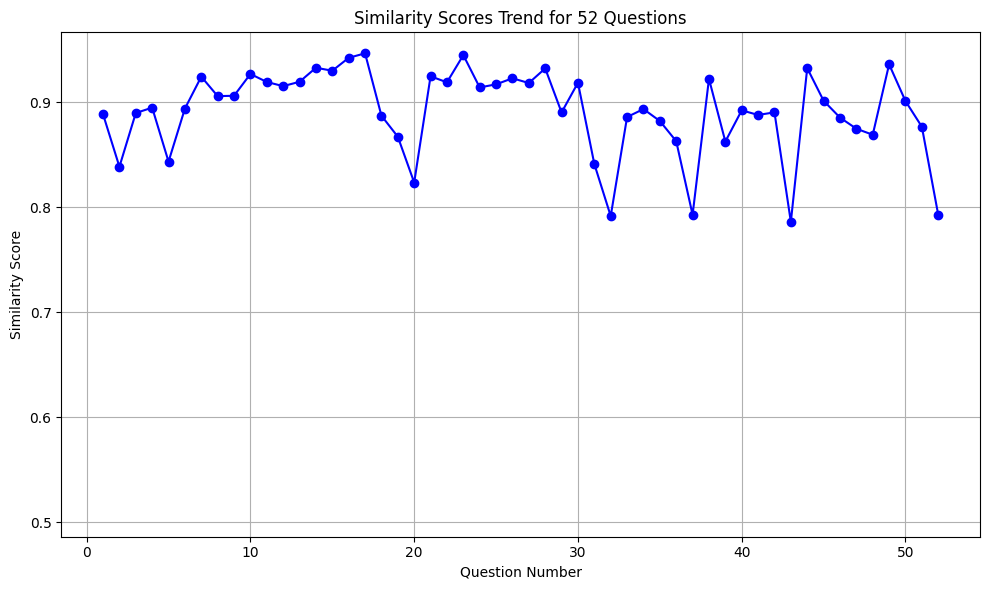

In [5]:
import matplotlib.pyplot as plt

# Similarity scores for 52 questions
similarity_scores = [
    0.88867074, 0.8386561, 0.8898417, 0.89496565, 0.84353626, 0.8940979, 0.9244718,
    0.90592647, 0.90629035, 0.9270445, 0.91941833, 0.9154583, 0.9196176, 0.9329797,
    0.93013483, 0.94243234, 0.94673294, 0.88728416, 0.8672515, 0.82359934, 0.924844,
    0.919091, 0.945015, 0.91421515, 0.91718096, 0.92293197, 0.9184336, 0.9323615,
    0.89039296, 0.9187042, 0.84123176, 0.7916291, 0.8860192, 0.89361167, 0.88222957,
    0.8630037, 0.7929039, 0.92238057, 0.862657, 0.8923923, 0.88800144, 0.8904718,
    0.78606796, 0.9326125, 0.9015474, 0.8854995, 0.87488526, 0.8691326, 0.9362466,
    0.901206, 0.87675387, 0.7927715
]

# Generate question numbers
question_numbers = list(range(1, len(similarity_scores) + 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(question_numbers, similarity_scores, color='blue', marker='o', linestyle='-')
plt.title('Similarity Scores Trend for 52 Questions')
plt.xlabel('Question Number')
plt.ylabel('Similarity Score')
plt.grid(True)

# Set y-axis limits
plt.ylim(min(similarity_scores) - 0.3, max(similarity_scores) + 0.02)

plt.tight_layout()
plt.show()

# Running Kernel Density Estimation to see where are the scores are mainlly distributed:

/tmp/ipykernel_23/27248019.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(similarity_scores, shade=True, color="b")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


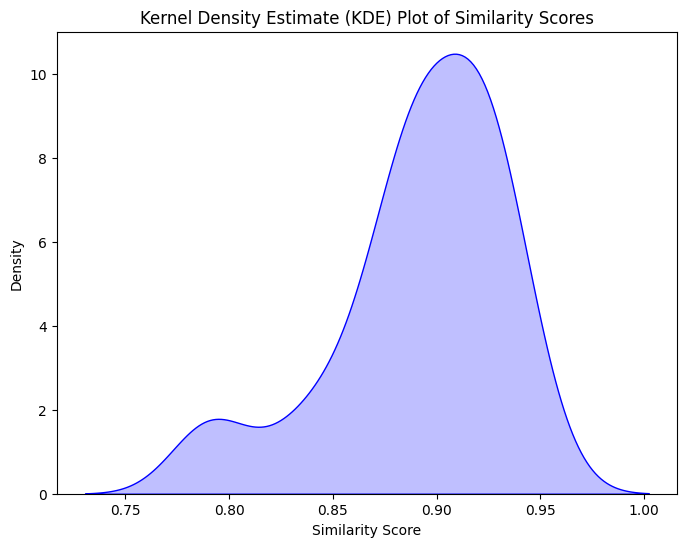

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the KDE plot using Seaborn
plt.figure(figsize=(8,6))  # Optional: Adjust the figure size
sns.kdeplot(similarity_scores, shade=True, color="b")

# Step 2: Add titles and labels
plt.title('Kernel Density Estimate (KDE) Plot of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Density')

# Step 3: Show the plot
plt.show()


the Kernel Density Estimation shows that the majority of semantic scores are  between 85%and 97% which shows a high semilarity between human and chatgpt responses.

# Validate the results reported using another competitor LLM chatbot, Gemini
in the next, we are showing the results of similarity regading every question and it's repsoses from both human and ChatGPT. A boxplot is used to show where most of the scores reported by Gemini are located. Prompts P9 and P10 of the questionnaires has special questions as reported in Table 3. They results displayed using barcharts and in the next script we run them with confidence intervals using the Wilson method

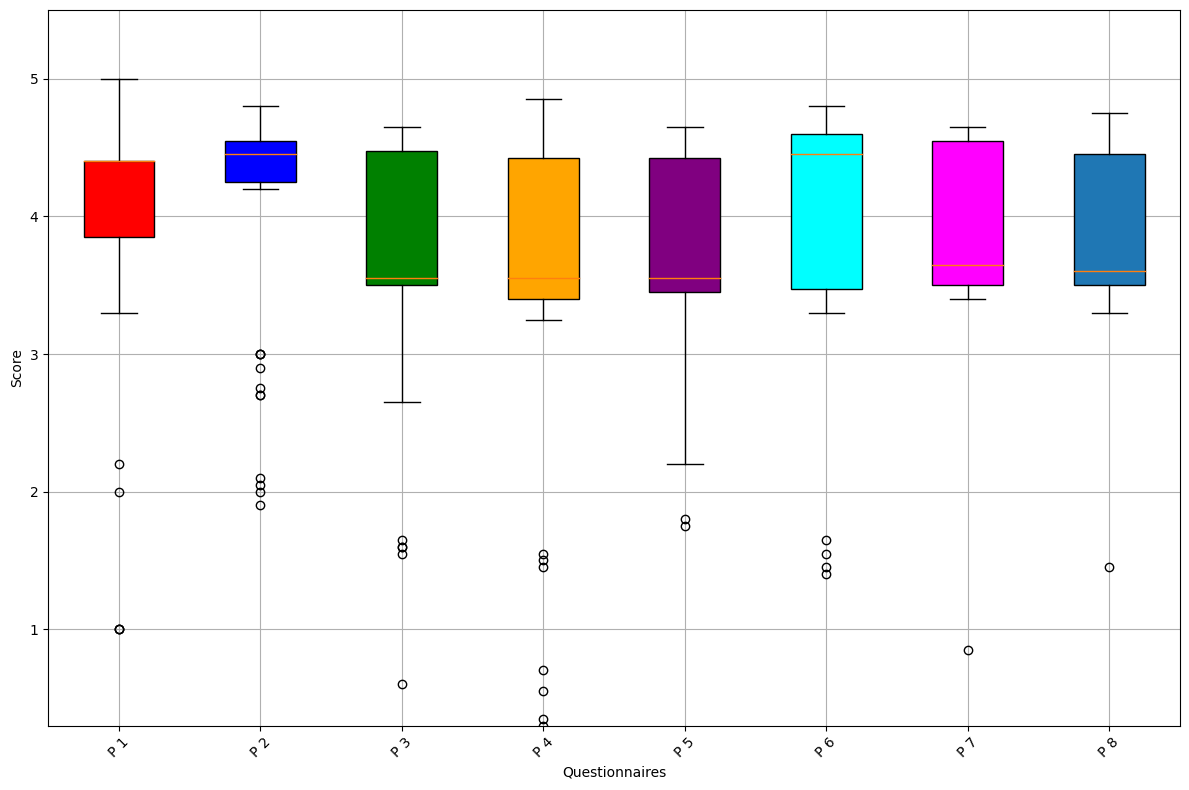

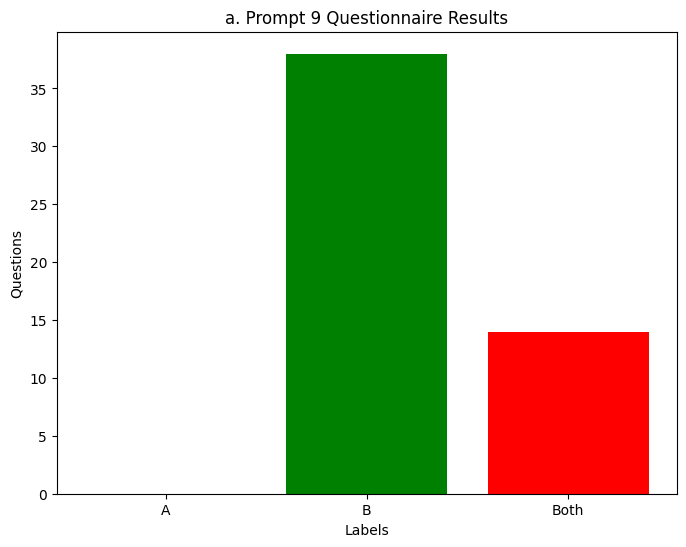

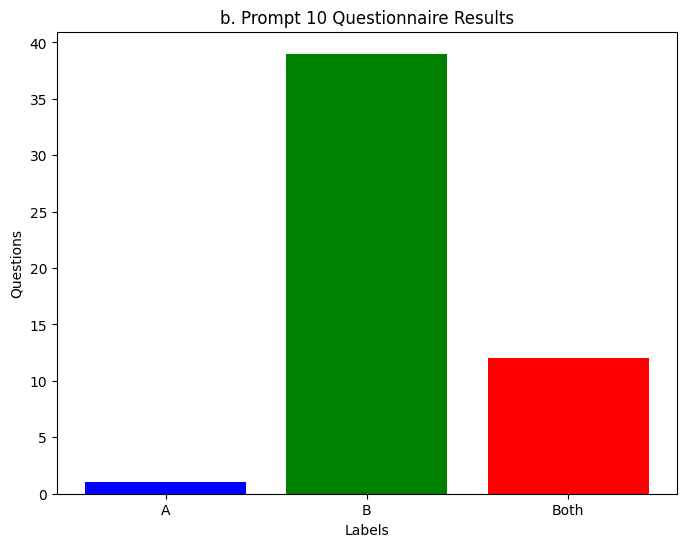

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/kaggle/input/bardreplays/bard.csv')  # Replace 'your_file.csv' with the path to your CSV file

# Assuming your data is in the format of 7 columns and 52 rows
num_cases = len(data)  # Number of cases
num_questionnaires = len(data.columns)  # Number of questionnaires

# Define colors for each box plot
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']

# Plotting box plot with colors
plt.figure(figsize=(12, 8))

# Create box plot
box = plt.boxplot(data.values, patch_artist=True)

# Apply colors to boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

#plt.title('Scores for 8-Prompts Questionnaires across 52 Questions')
plt.xlabel('Questionnaires')
plt.ylabel('Score')
plt.xticks(range(1, num_questionnaires + 1), [f'P {i+1}' for i in range(num_questionnaires)], rotation=45)
plt.grid(True)

# Set y-axis limits
plt.ylim(np.min(data.values), np.max(data.values)+0.5)

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Define the scores and labels
scores = [0, 38, 14]
labels = ['A', 'B', 'Both']

# Plotting the scores
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green', 'red'])
plt.xlabel('Labels')
plt.ylabel('Questions')
plt.title('a. Prompt 9 Questionnaire Results')
plt.show()

# Prompt 10 the scores and labels
scores = [1, 39, 12]
labels = ['A', 'B', 'Both']

# Plotting the scores
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green', 'red'])
plt.xlabel('Labels')
plt.ylabel('Questions')
plt.title('b. Prompt 10 Questionnaire Results')
plt.show()

# Barcharts of P9 and P10 using confidence intervals using the Wilson method
Gemini results using barcharts showing the proportion of questions labeled “A”, “B”, and “Both” for Prompt 9 and Prompt 10. Error bars indicate 95% confidence intervals using the Wilson method.

In [8]:
del sum


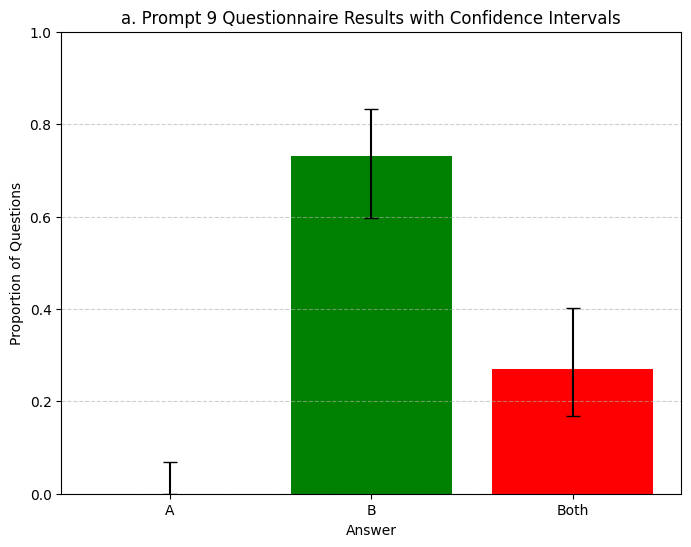

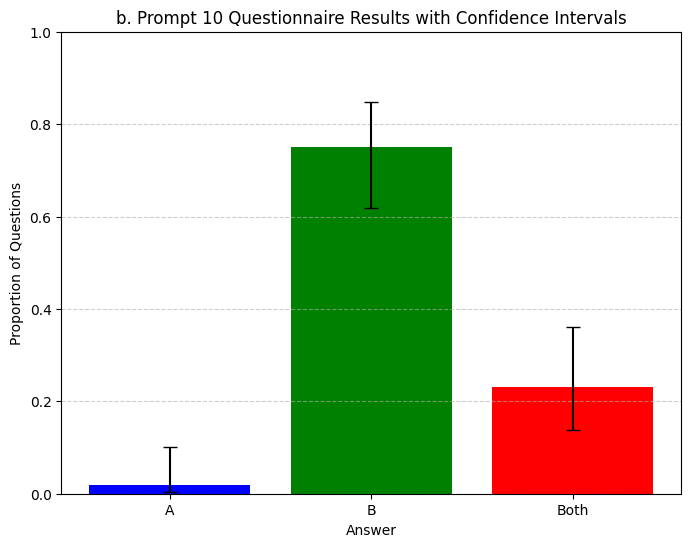

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportion_confint

# Function to plot proportions with 95% confidence intervals
def plot_with_confidence(scores, prompt_title):
    total = sum(scores)
    proportions = [s / total for s in scores]
    labels = ['A', 'B', 'Both']
    
    # Wilson score confidence intervals
    conf_intervals = [proportion_confint(s, total, alpha=0.05, method='wilson') for s in scores]
    lower_errors = [p - ci[0] for p, ci in zip(proportions, conf_intervals)]
    upper_errors = [ci[1] - p for p, ci in zip(proportions, conf_intervals)]

    # Plot
    plt.figure(figsize=(8, 6))
    plt.bar(labels, proportions, yerr=[lower_errors, upper_errors], capsize=5, color=['blue', 'green', 'red'])
    plt.xlabel('Answer')
    plt.ylabel('Proportion of Questions')
    plt.title(prompt_title)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

# Prompt 9 data
scores_prompt9 = [0, 38, 14]
plot_with_confidence(scores_prompt9, 'a. Prompt 9 Questionnaire Results with Confidence Intervals')

# Prompt 10 data
scores_prompt10 = [1, 39, 12]
plot_with_confidence(scores_prompt10, 'b. Prompt 10 Questionnaire Results with Confidence Intervals')


# To cite this work use:


The paper is under review by PeerJ for computer science journal.
